<a href="https://colab.research.google.com/github/sets018/DM_Project/blob/main/EDA_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Logo_uninorte_colombia.jpg/1200px-Logo_uninorte_colombia.jpg" width=70%></img>

#Data Mining - 202430 - Project
##Exploratory Data Analysis (EDA)
### Set Salas, Mateo Valencia, ..........................,
### 200166321,

###Loading the dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dataset = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets
df = dataset.data.original

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


#### Metadata

In [ ]:
# metadata
dataset.metadata

{'uci_id': 296,
 'name': 'Diabetes 130-US Hospitals for Years 1999-2008',
 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008',
 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv',
 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide

In [ ]:
# variable information
dataset.variables

,name,role,type,demographic,description,units,missing_values
0,encounter_id,ID,,None,Unique identifier of an encounter,None,no
1,patient_nbr,ID,,None,Unique identifier of a patient,None,no
2,race,Feature,Categorical,Race,"Values: Caucasian, Asian, African American, Hi...",None,yes
3,gender,Feature,Categorical,Gender,"Values: male, female, and unknown/invalid",None,no
4,age,Feature,Categorical,Age,"Grouped in 10-year intervals: [0, 10), [10, 20...",None,no
5,weight,Feature,Categorical,None,Weight in pounds.,None,yes
6,admission_type_id,Feature,Categorical,None,Integer identifier corresponding to 9 distinct...,None,no
7,discharge_disposition_id,Feature,Categorical,None,Integer identifier corresponding to 29 distinc...,None,no
8,admission_source_id,Feature,Categorical,None,Integer identifier corresponding to 21 distinc...,None,no
9,time_in_hospital,Feature,Integer,None,Integer number of days between admission and d...,None,no


#### Data Overview

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# Data Overview
data_info = {
    'Número de observaciones': df.shape[0],
    'Número de variables': df.shape[1]
}
print(data_info)

{'Número de observaciones': 101766, 'Número de variables': 50}


In [ ]:
# Dtypes and missing values
missing_values = df.isna().sum()
data_types = df.dtypes

data_overview_df = pd.DataFrame({
    'Datatype': data_types,
    'Missing_observations': missing_values,
    'Percentage (%)': (missing_values / len(df)) * 100
})

data_overview_df.reset_index(inplace=True)
data_overview_df.columns = ['Variable', 'Datatype', 'Missing_observations', 'Percentage (%)']
data_overview_df.sort_values(by = "Percentage (%)", inplace=True, ascending = False)
data_overview_df

,Variable,Datatype,Missing_observations,Percentage (%)
5,weight,object,98569,96.858479
22,max_glu_serum,object,96420,94.746772
23,A1Cresult,object,84748,83.277322
11,medical_specialty,object,49949,49.082208
10,payer_code,object,40256,39.557416
2,race,object,2273,2.233555
20,diag_3,object,1423,1.398306
19,diag_2,object,358,0.351787
18,diag_1,object,21,0.020636
0,encounter_id,int64,0,0.000000


In [ ]:
# Statistical summary
num_stats = df.describe()
num_stats

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
# categorical variables summary
cat_columns = df.select_dtypes(include=['object']).columns
cat_summary = df[cat_columns].describe()
cat_summary

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,5346,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,17,72,716,748,789,3,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,Norm,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,2597,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


#### Data Visualization

for getting specific metadata regarding a variable

What do the instances in this dataset represent?

The instances represent hospitalized patient records diagnosed with diabetes.

Features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

(all of them)

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

(inpatient) encounter involves hospilization for 1 or more days
(outpatient) does not involve hospitalization



In [ ]:
def get_var_data(var):
  data = dataset.variables[dataset.variables["name"] == var]["description"].values[0]
  return data

In [ ]:
get_var_data("repaglinide")

'The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed'

####Univariate Analysis

Patient Demographics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")

In [ ]:
df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

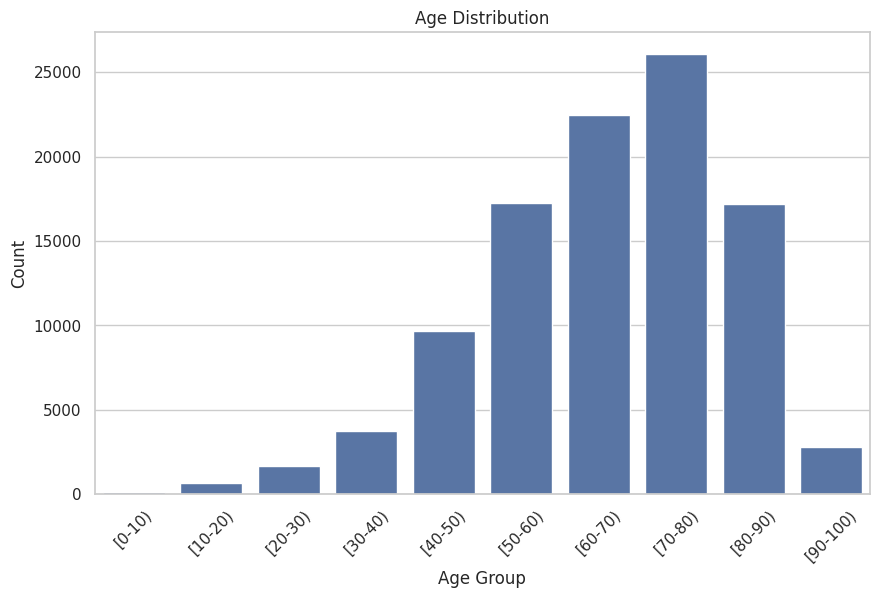

In [ ]:
# Plot 1: Age Distribution
plt.figure(figsize=(10, 6))
age_order = sorted(df['age'].unique())  # Ensure correct order of age groups
sns.countplot(data=df, x='age', order=age_order)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

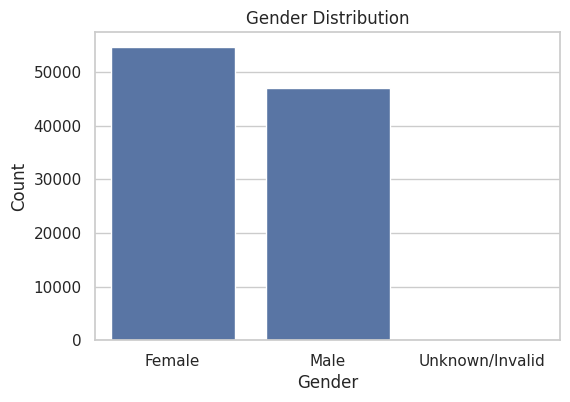

In [ ]:
# Plot 2: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

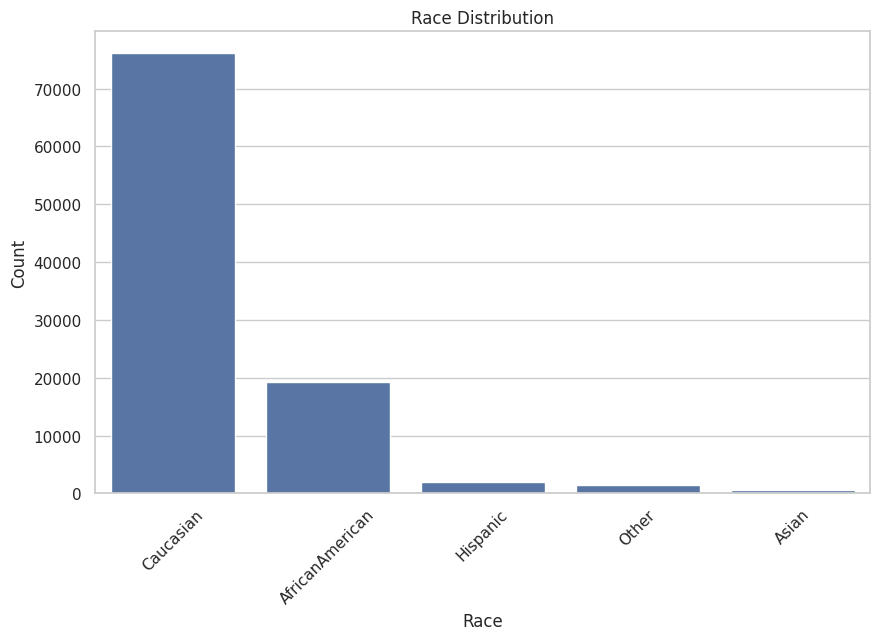

In [ ]:
# Plot 3: Race Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', order=df['race'].value_counts().index)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

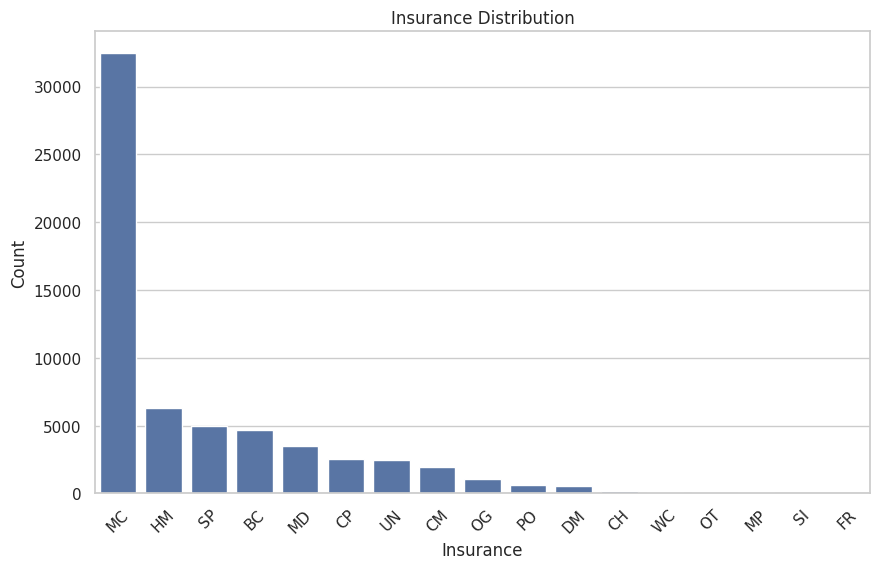

In [ ]:
# Plot 4.Insurance
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='payer_code', order=df['payer_code'].value_counts().index)
plt.title('Insurance Distribution')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Hospital Encounter Features

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

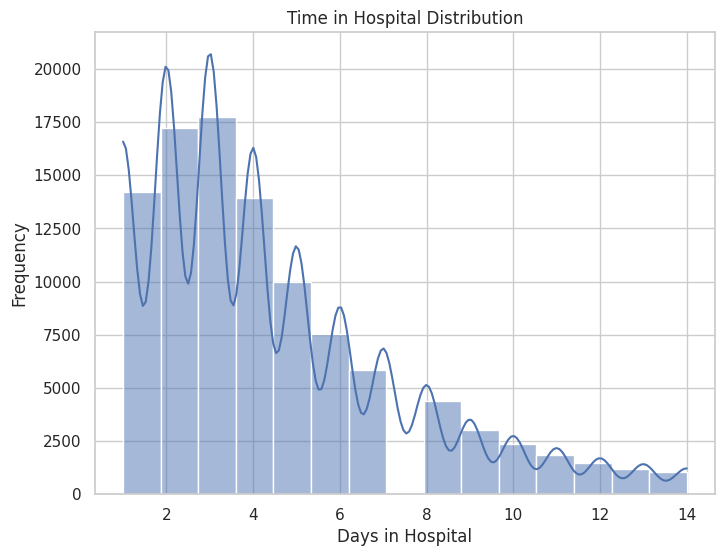

In [ ]:
# Plot 1: Time in Hospital
plt.figure(figsize=(8, 6))
sns.histplot(df['time_in_hospital'], bins=15, kde=True)
plt.title('Time in Hospital Distribution')
plt.xlabel('Days in Hospital')
plt.ylabel('Frequency')
plt.show()

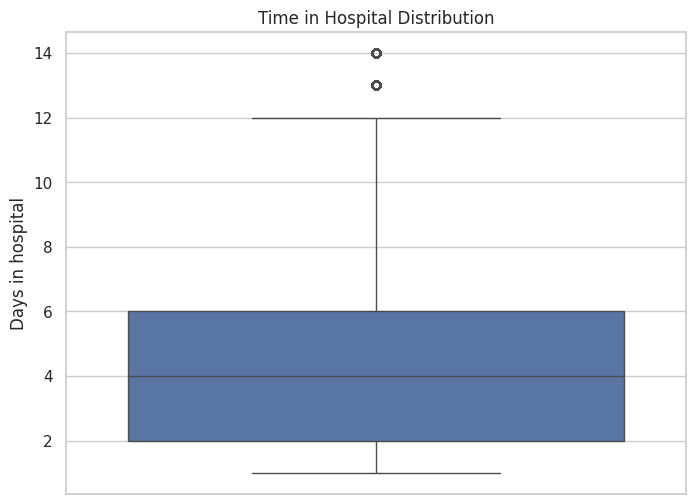

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='time_in_hospital')
plt.title('Time in Hospital Distribution')
plt.ylabel('Days in hospital')
plt.show()

In [ ]:
# Dictionary mapping admission type IDs to their corresponding descriptions
admission_type_labels = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

# Replace the admission_type_id column with the descriptive labels
df['admission_type_id'] = df['admission_type_id'].map(admission_type_labels)

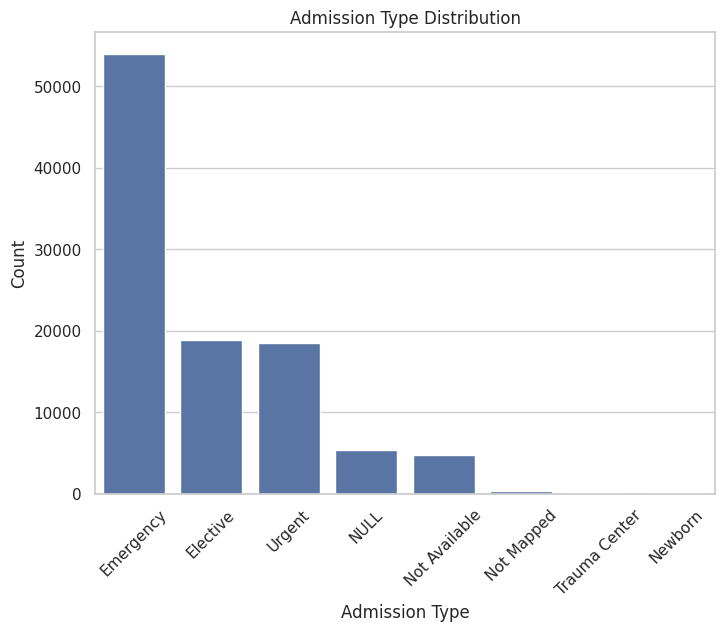

In [ ]:
# Plot 2: Admission Type
plt.figure(figsize=(8, 6))
admission_type_order = df['admission_type_id'].value_counts().index
sns.countplot(data=df, x='admission_type_id', order=admission_type_order)
plt.title('Admission Type Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

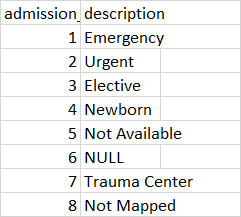

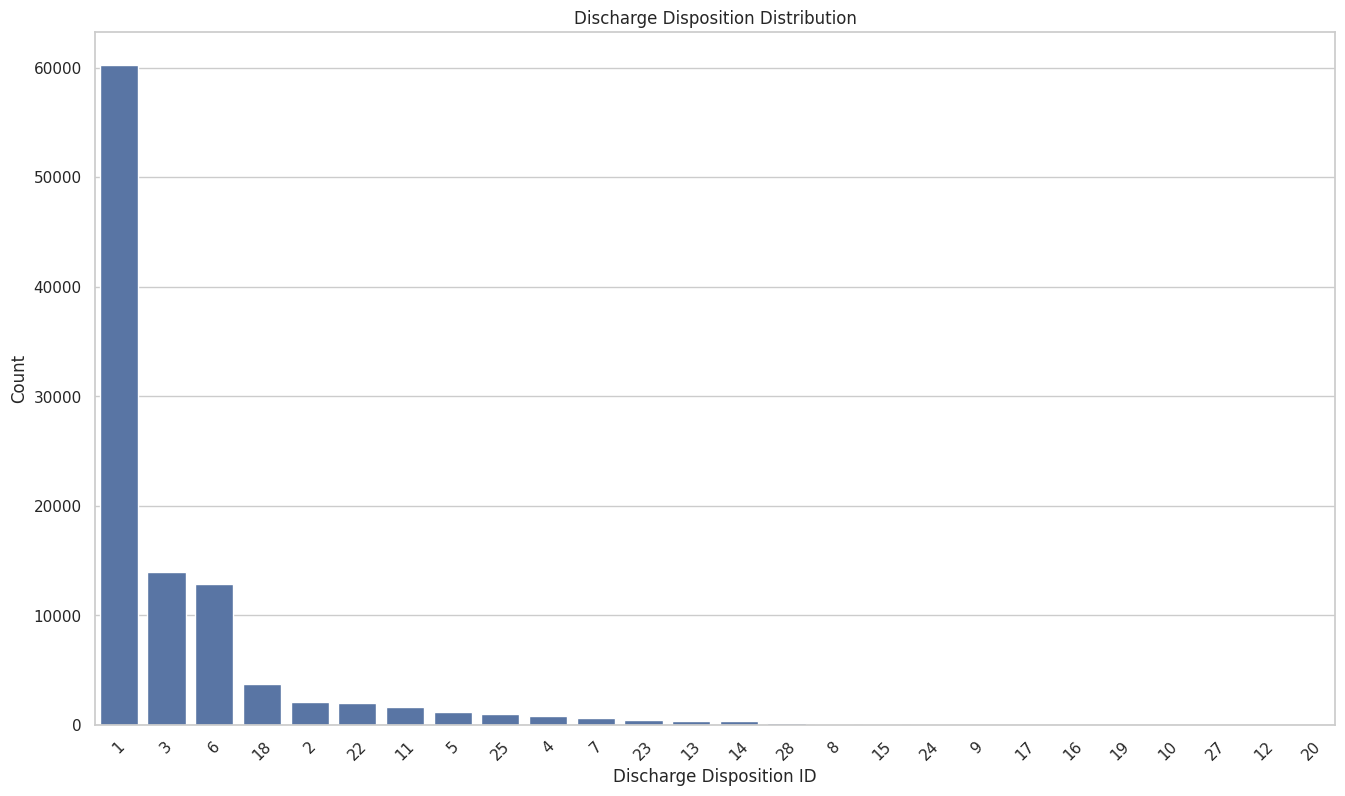

In [ ]:
# Plot 3: Discharge Disposition
plt.figure(figsize=(16, 9))
discharge_order = df['discharge_disposition_id'].value_counts().index
sns.countplot(data=df, x='discharge_disposition_id', order=discharge_order)
plt.title('Discharge Disposition Distribution')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

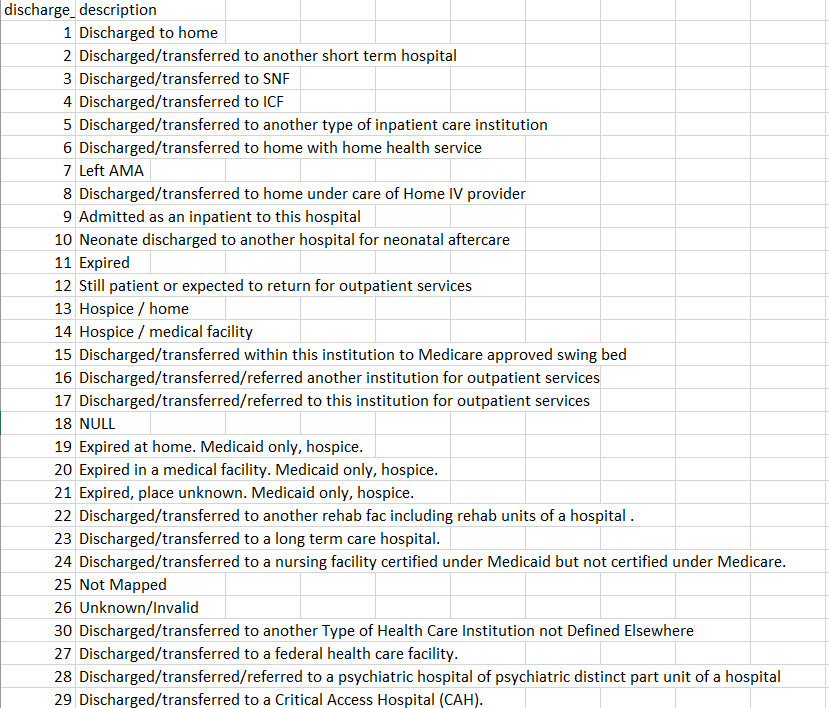

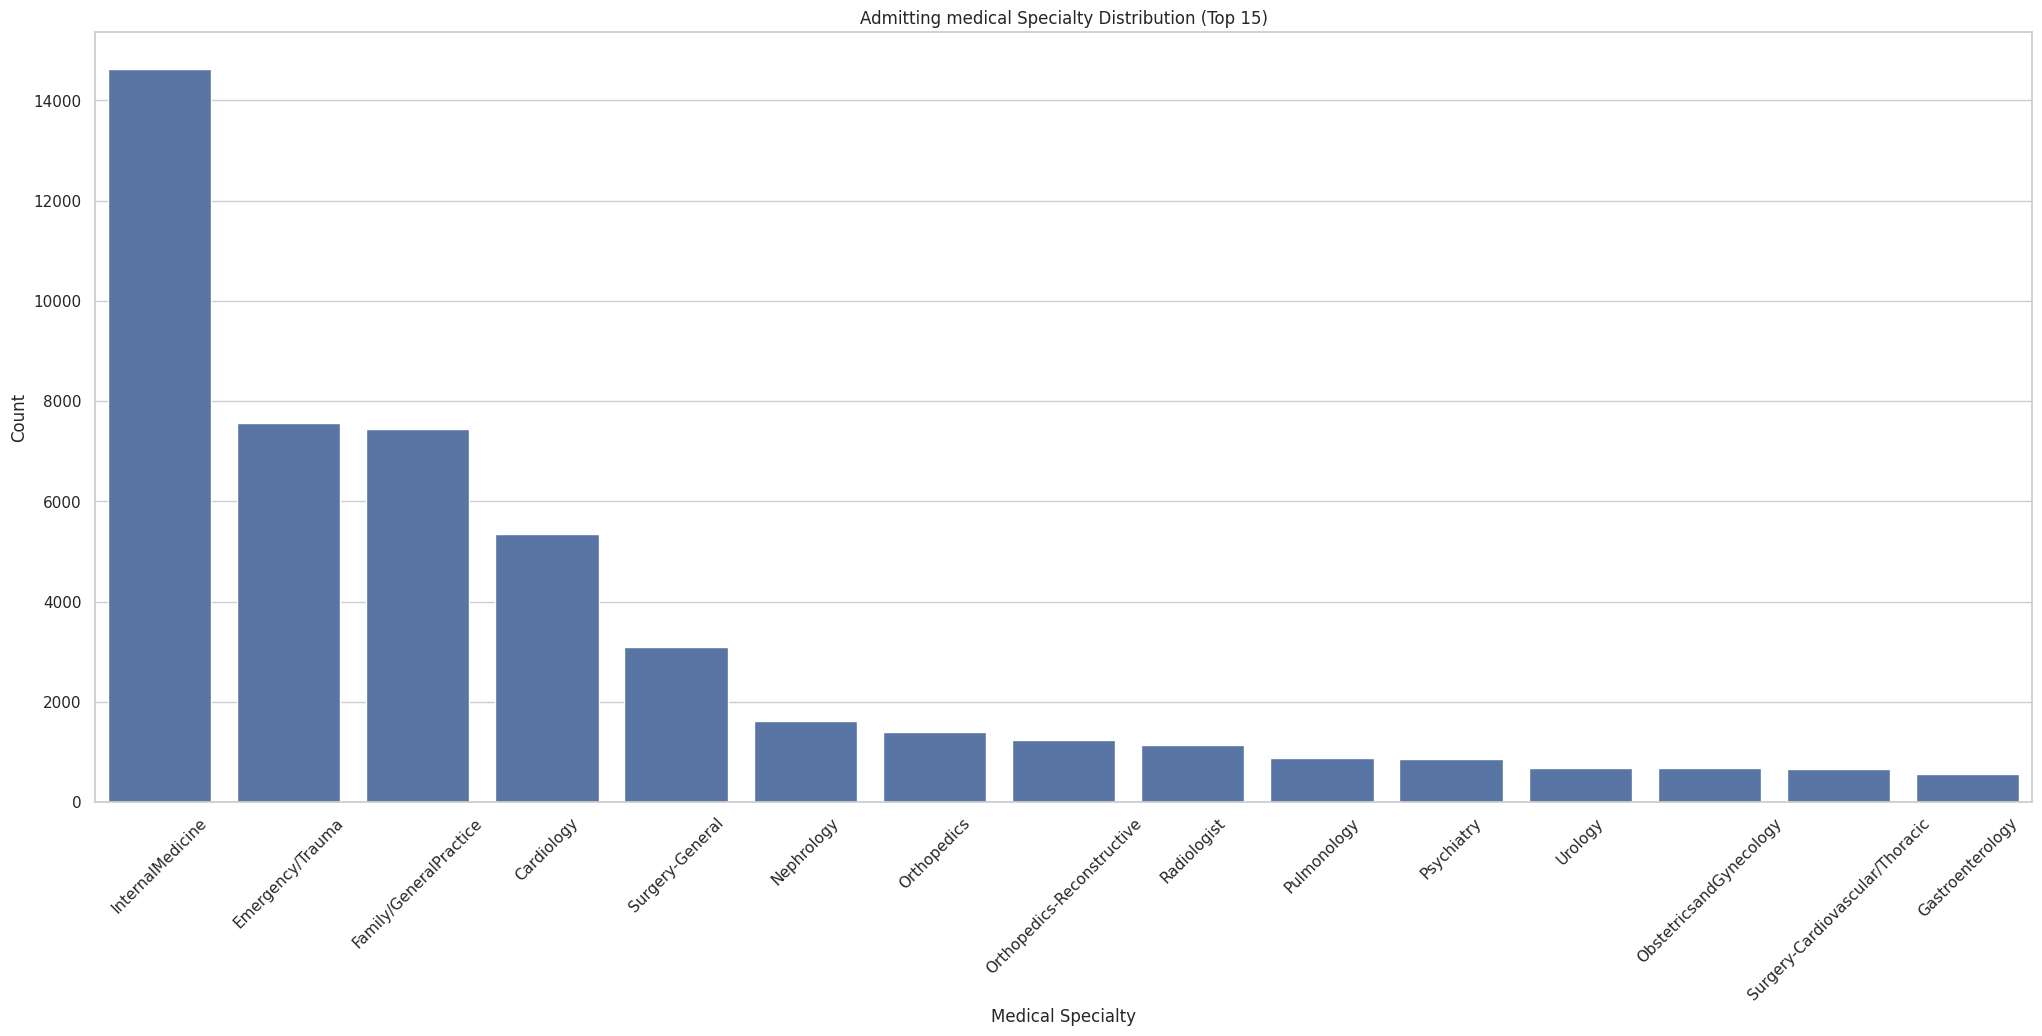

In [ ]:
# Plot 4: Medical Specialty
plt.figure(figsize=(25, 10))
specialty_order = df['medical_specialty'].value_counts().index[:15]  # Top 10 specialties for readability
sns.countplot(data=df, x='medical_specialty', order=specialty_order)
plt.title('Admitting medical Specialty Distribution (Top 15)')
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def get_bins(var):
  # Step 1: Calculate IQR (Interquartile Range)
  q75, q25 = np.percentile(df[var], [75, 25])
  iqr = q75 - q25

  # Step 2: Calculate the bin width using Freedman-Diaconis rule
  n = len(df[var])
  bin_width = 2 * iqr / np.cbrt(n)

  # Step 3: Calculate the number of bins
  data_range = df[var].max() - df[var].min()
  bins = int(np.ceil(data_range / bin_width))
  return bins

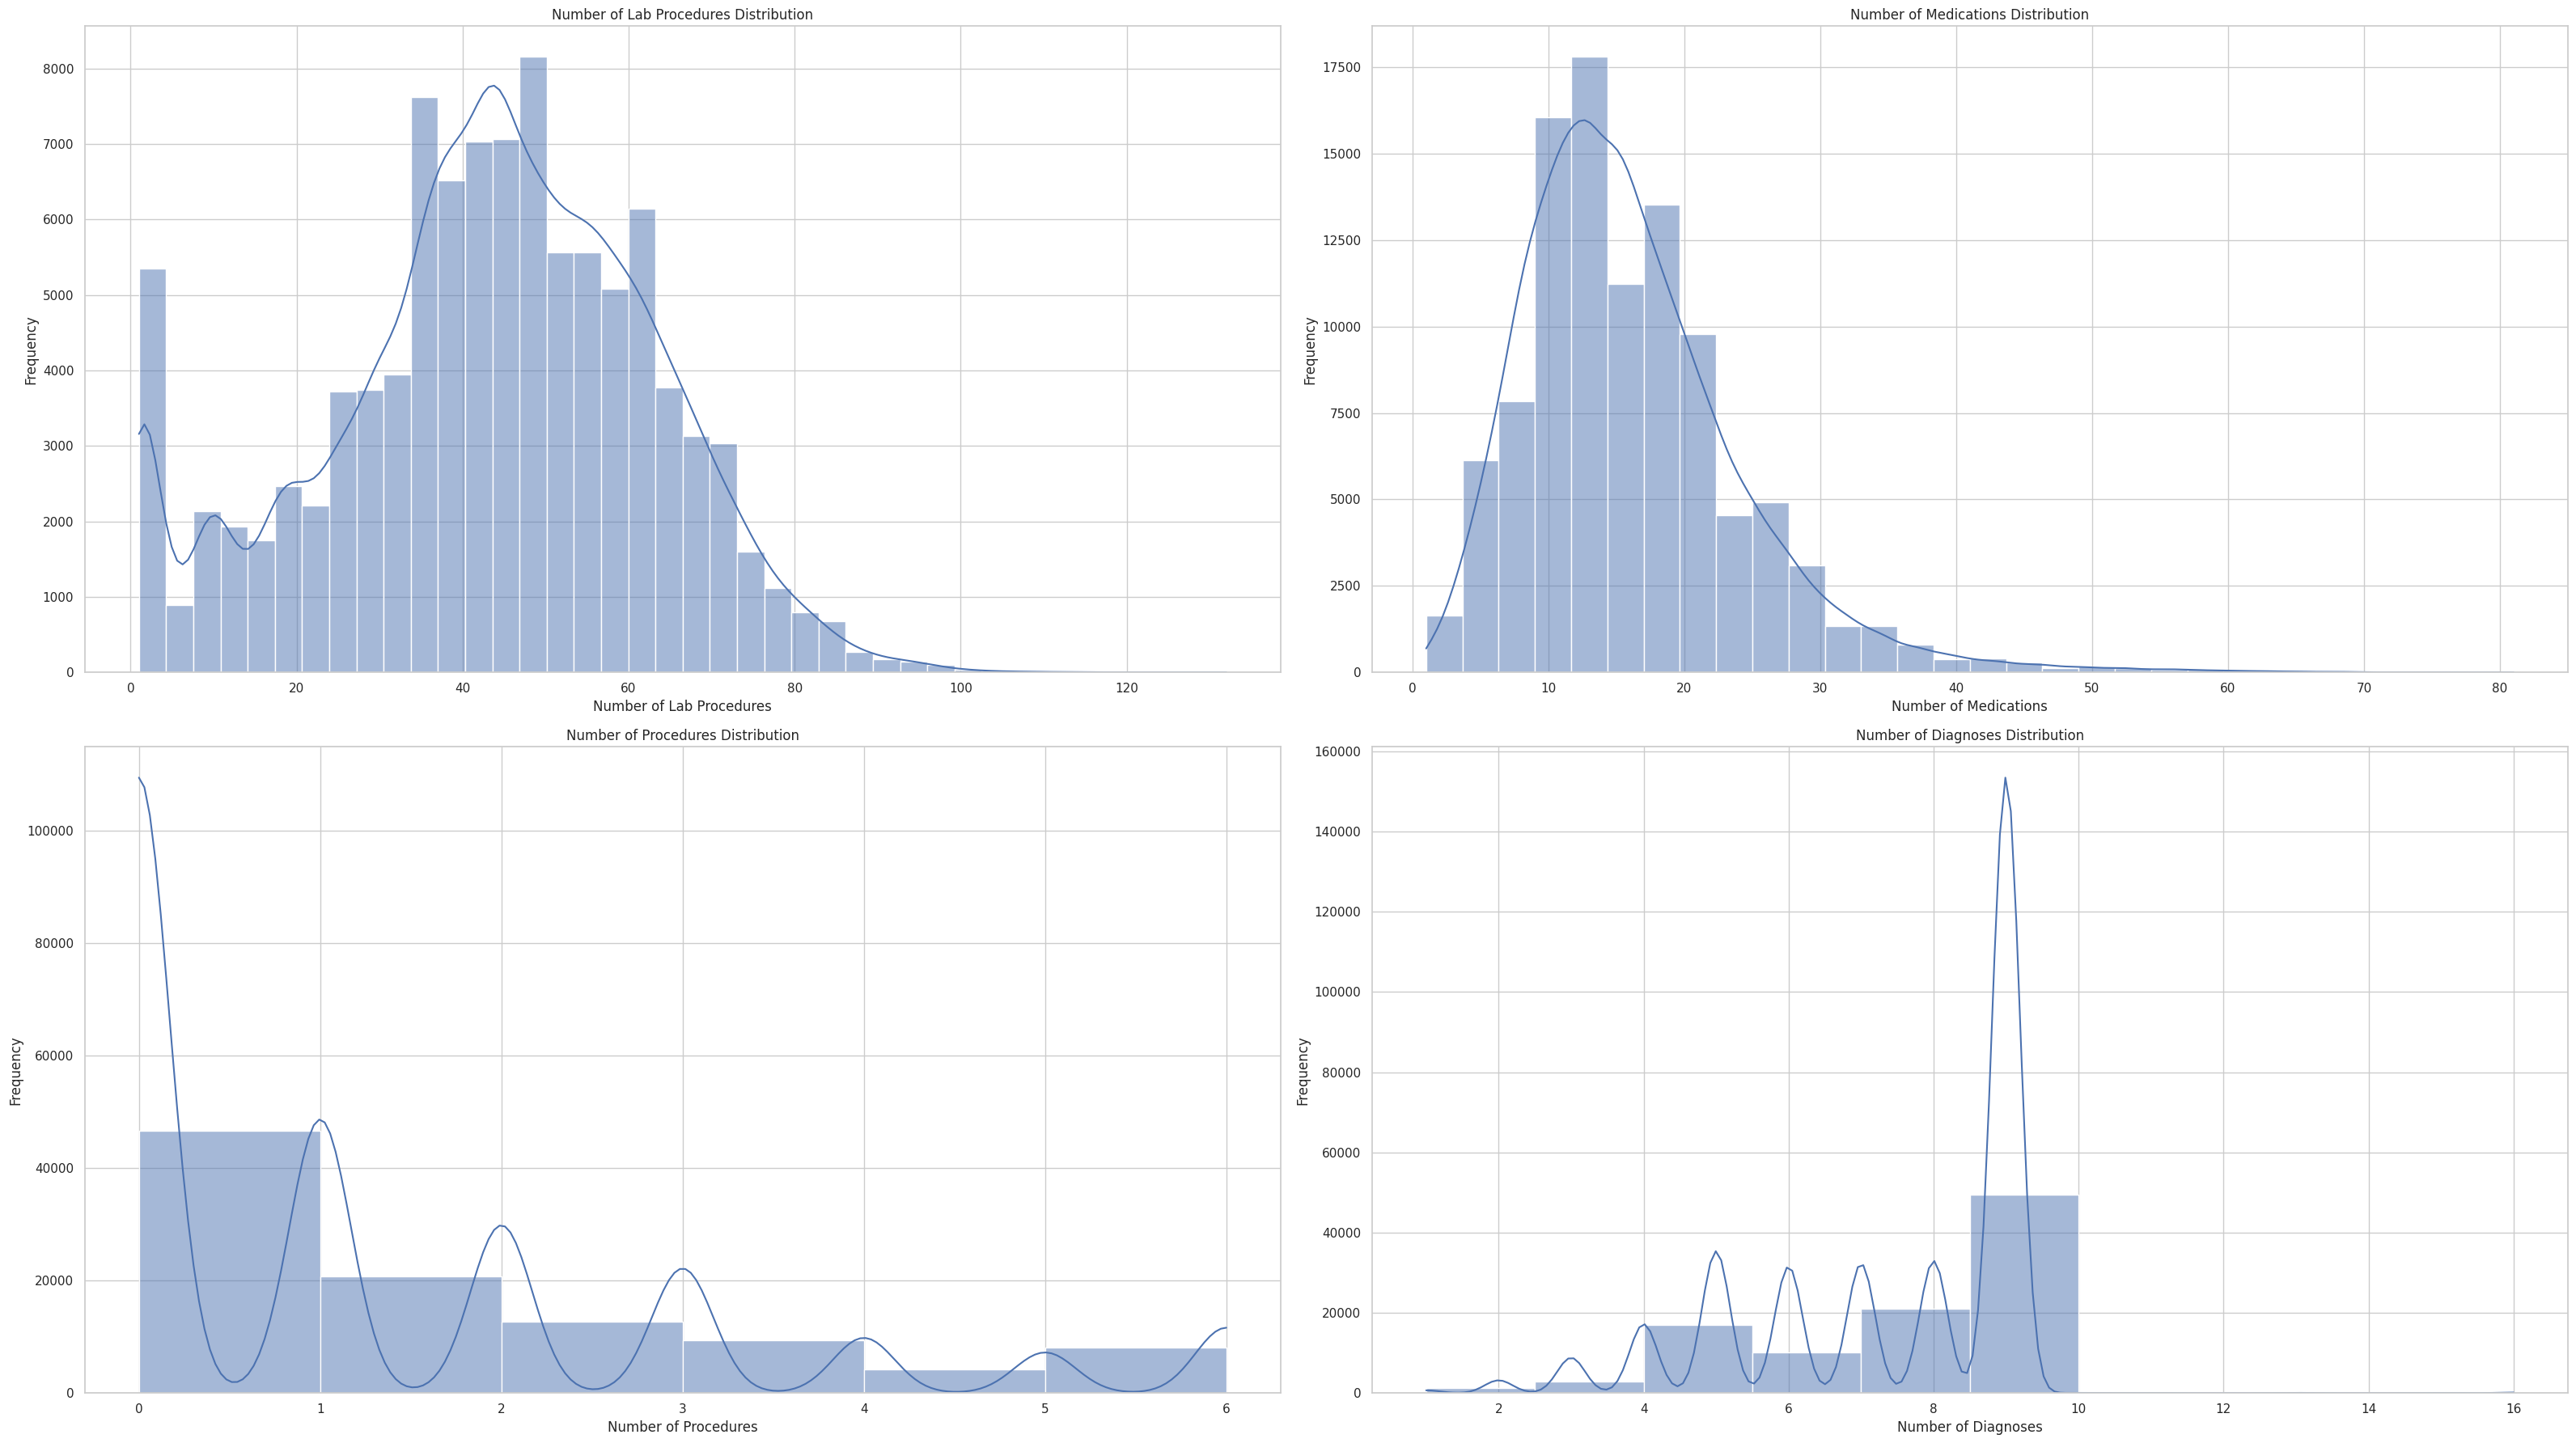

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(2, 2, figsize=(32, 18))

# Plot 1: Number of Lab Procedures
sns.histplot(df['num_lab_procedures'], bins = 40,  kde=True, ax=ax[0][0])
ax[0][0].set_title('Number of Lab Procedures Distribution')
ax[0][0].set_xlabel('Number of Lab Procedures')
ax[0][0].set_ylabel('Frequency')

# Plot 2: Number of Medications
sns.histplot(df['num_medications'],   bins = 30, kde=True, ax=ax[0][1])
ax[0][1].set_title('Number of Medications Distribution')
ax[0][1].set_xlabel('Number of Medications')
ax[0][1].set_ylabel('Frequency')

# Plot 3: Number of num_procedures
sns.histplot(df['num_procedures'],  bins = 6,  kde=True, ax=ax[1][0])
ax[1][0].set_title('Number of Procedures Distribution')
ax[1][0].set_xlabel('Number of Procedures')
ax[1][0].set_ylabel('Frequency')

# Plot 3: Number of num_procedures
sns.histplot(df['number_diagnoses'],  bins = 10, kde=True, ax=ax[1][1])
ax[1][1].set_title('Number of Diagnoses Distribution')
ax[1][1].set_xlabel('Number of Diagnoses')
ax[1][1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

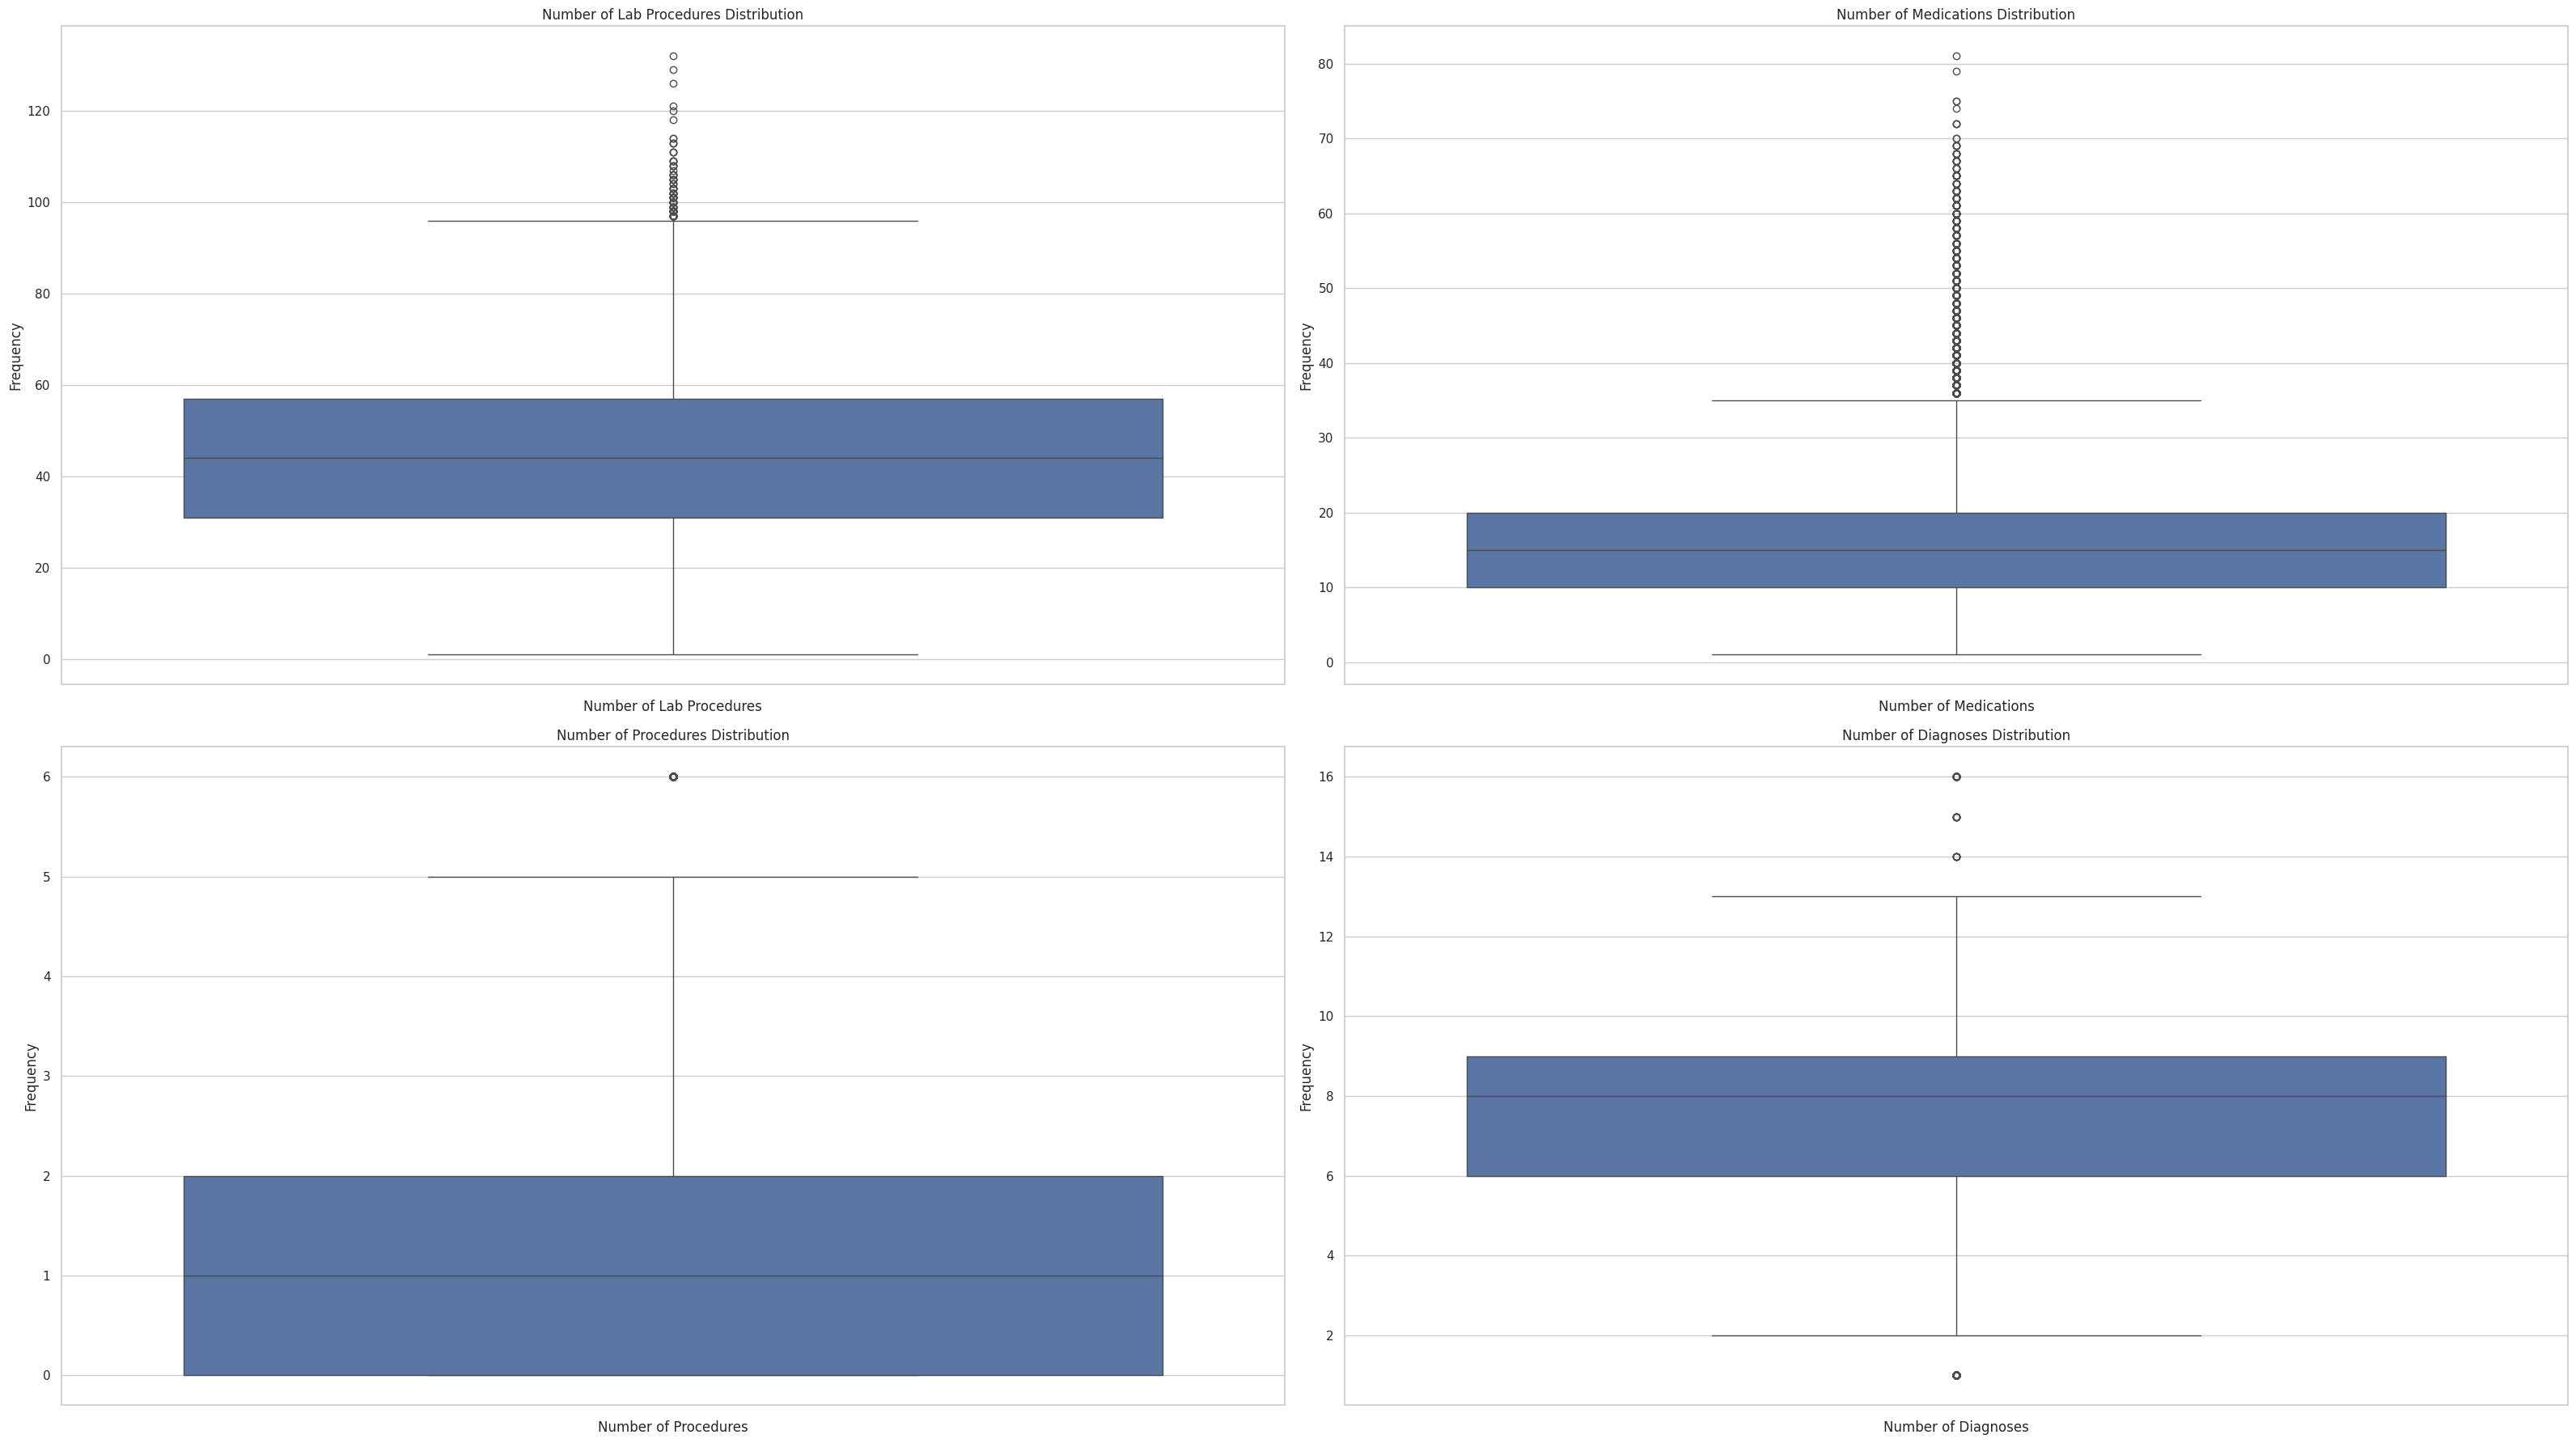

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(2, 2, figsize=(32, 18))

# Plot 1: Number of Lab Procedures
sns.boxplot(data = df, y = 'num_lab_procedures',ax=ax[0][0])
ax[0][0].set_title('Number of Lab Procedures Distribution')
ax[0][0].set_xlabel('Number of Lab Procedures')
ax[0][0].set_ylabel('Frequency')

# Plot 2: Number of Medications
sns.boxplot(data = df, y = 'num_medications', ax=ax[0][1])
ax[0][1].set_title('Number of Medications Distribution')
ax[0][1].set_xlabel('Number of Medications')
ax[0][1].set_ylabel('Frequency')

# Plot 3: Number of num_procedures
sns.boxplot(data = df, y = 'num_procedures', ax=ax[1][0])
ax[1][0].set_title('Number of Procedures Distribution')
ax[1][0].set_xlabel('Number of Procedures')
ax[1][0].set_ylabel('Frequency')

# Plot 3: Number of num_procedures
sns.boxplot(data = df, y = 'number_diagnoses', ax=ax[1][1])
ax[1][1].set_title('Number of Diagnoses Distribution')
ax[1][1].set_xlabel('Number of Diagnoses')
ax[1][1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

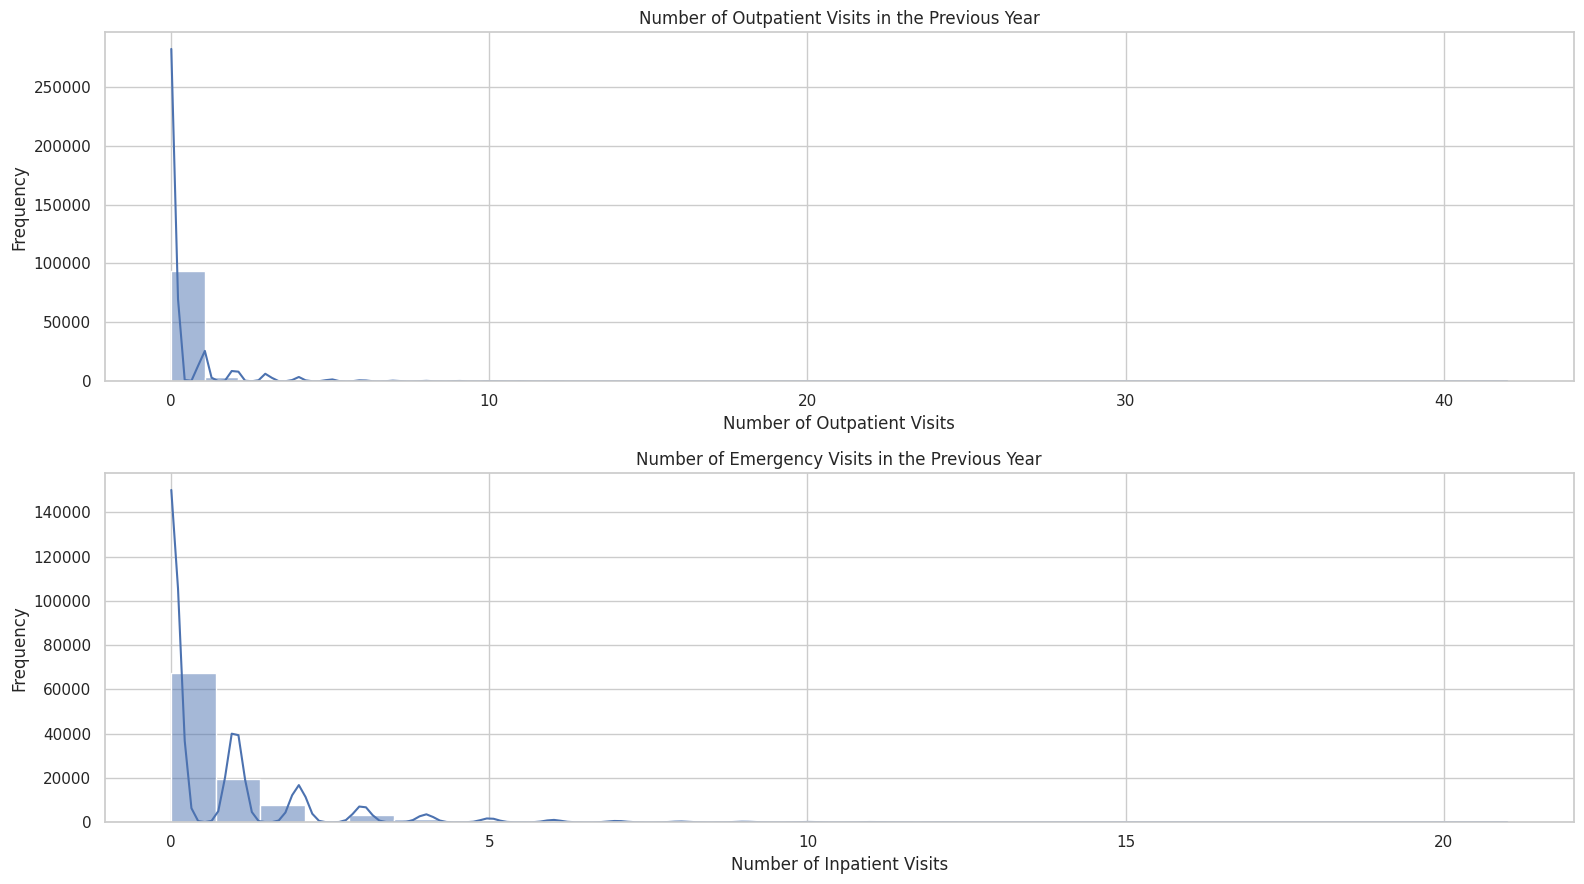

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(2, figsize=(16, 9))

# Plot 1: Number of Outpatient Visits
sns.histplot(df['number_outpatient'],bins = 40,  kde=True, ax=ax[0])
ax[0].set_title('Number of Outpatient Visits in the Previous Year')
ax[0].set_xlabel('Number of Outpatient Visits')
ax[0].set_ylabel('Frequency')

# Plot 2: Number of Inpatient Visits
sns.histplot(df['number_inpatient'], bins = 30, kde=True, ax=ax[1])
ax[1].set_title('Number of Emergency Visits in the Previous Year')
ax[1].set_xlabel('Number of Inpatient Visits')
ax[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

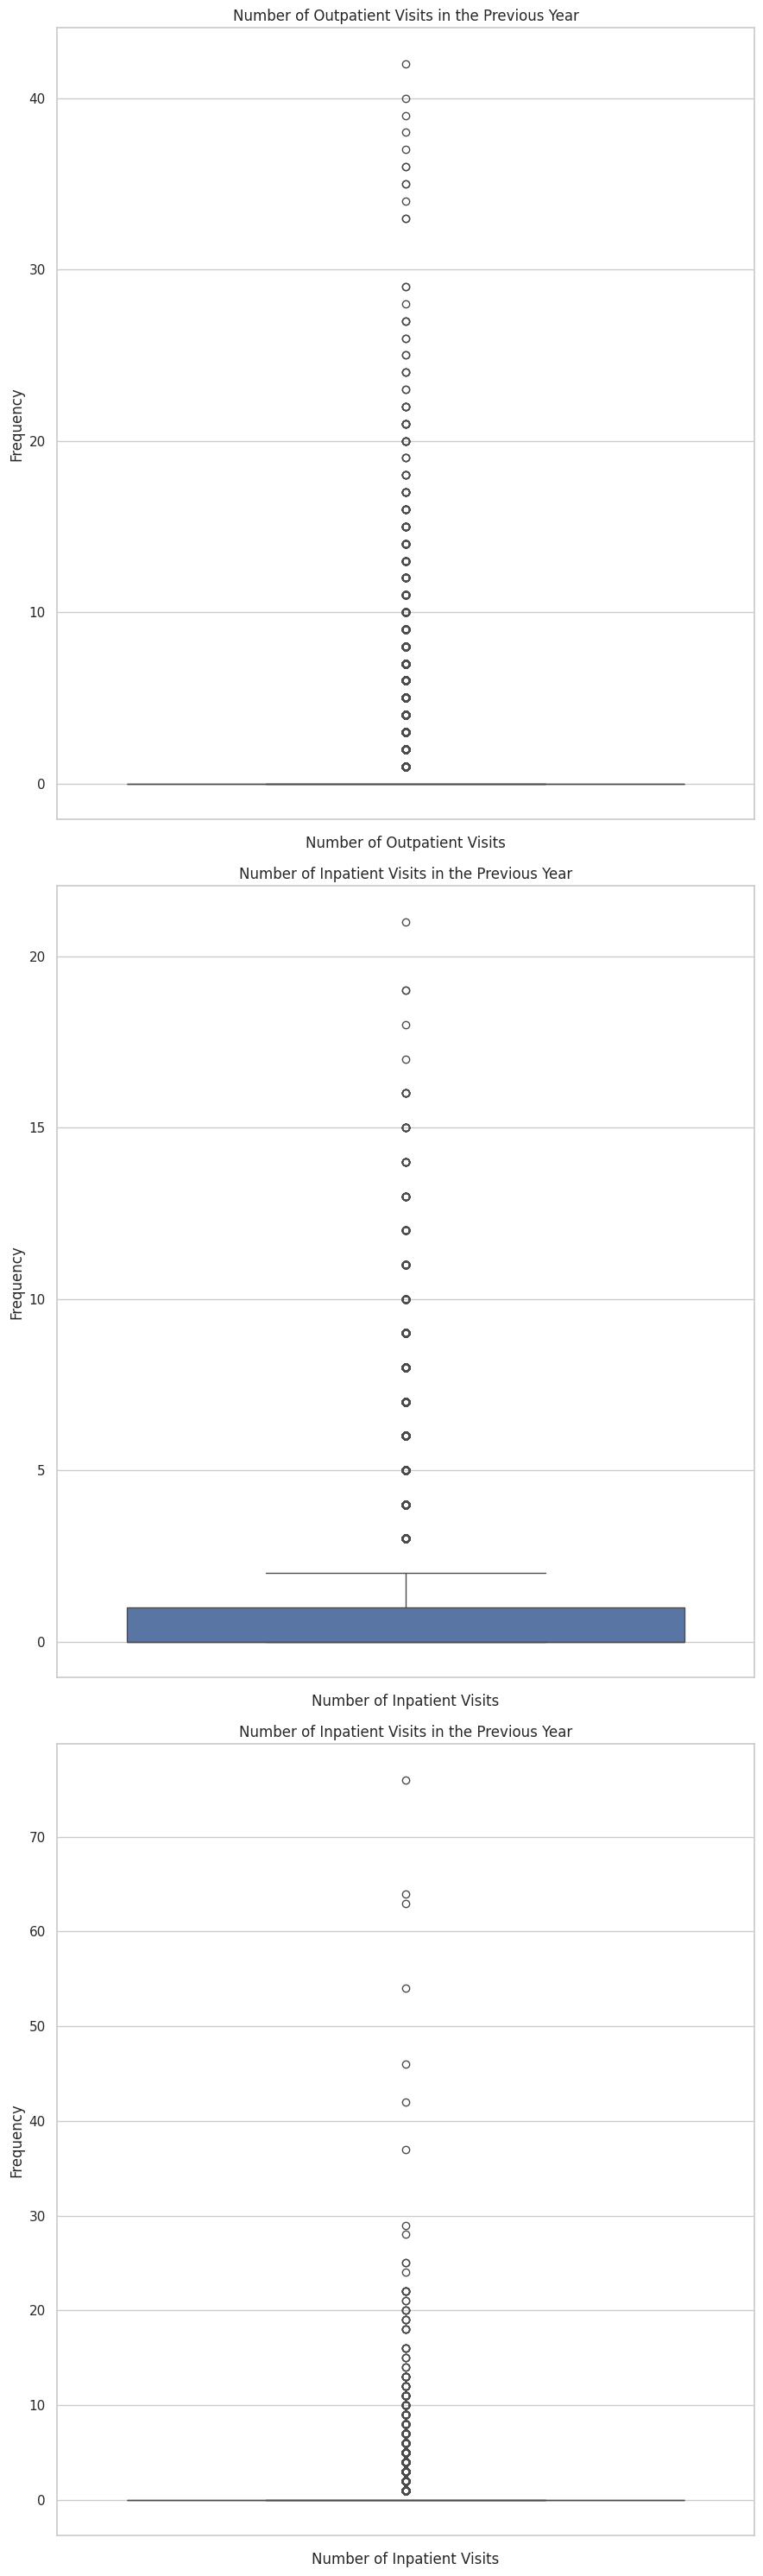

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(3, figsize=(9,30))

# Plot 1: Number of Outpatient Visits
sns.boxplot(df, y = 'number_outpatient',ax=ax[0])
ax[0].set_title('Number of Outpatient Visits in the Previous Year')
ax[0].set_xlabel('Number of Outpatient Visits')
ax[0].set_ylabel('Frequency')

# Plot 2: Number of Inpatient Visits
sns.boxplot(df, y = 'number_inpatient', ax=ax[1])
ax[1].set_title('Number of Inpatient Visits in the Previous Year')
ax[1].set_xlabel('Number of Inpatient Visits')
ax[1].set_ylabel('Frequency')

# Plot 2: Number of Inpatient Visits
sns.boxplot(df, y = 'number_emergency', ax=ax[2])
ax[2].set_title('Number of Inpatient Visits in the Previous Year')
ax[2].set_xlabel('Number of Inpatient Visits')
ax[2].set_ylabel('Frequency')


# Display the plot
plt.tight_layout()
plt.show()

Clinical Features

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

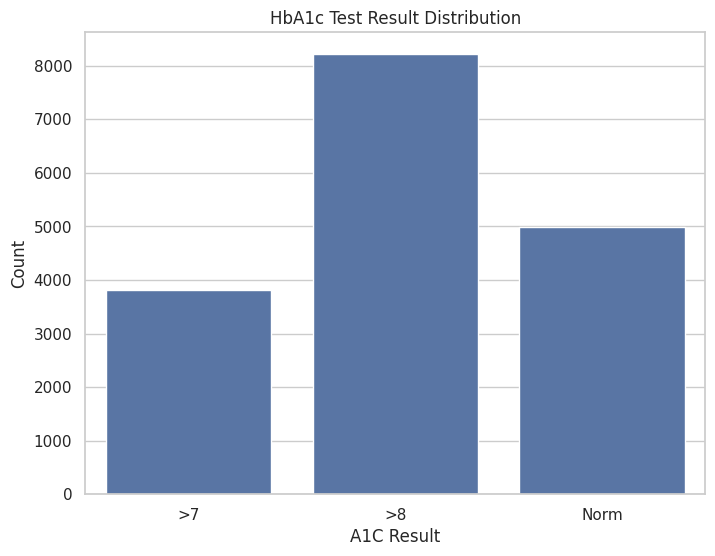

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='A1Cresult')
plt.title('HbA1c Test Result Distribution')
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.show()

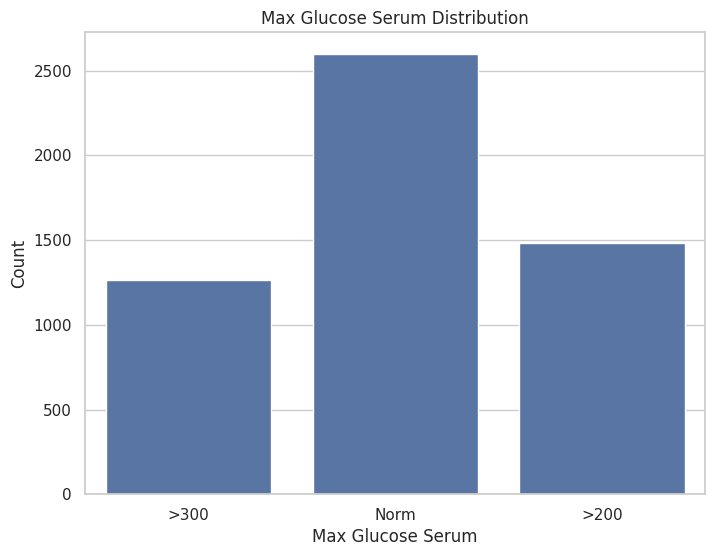

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='max_glu_serum')
plt.title('Max Glucose Serum Distribution')
plt.xlabel('Max Glucose Serum')
plt.ylabel('Count')
plt.show()

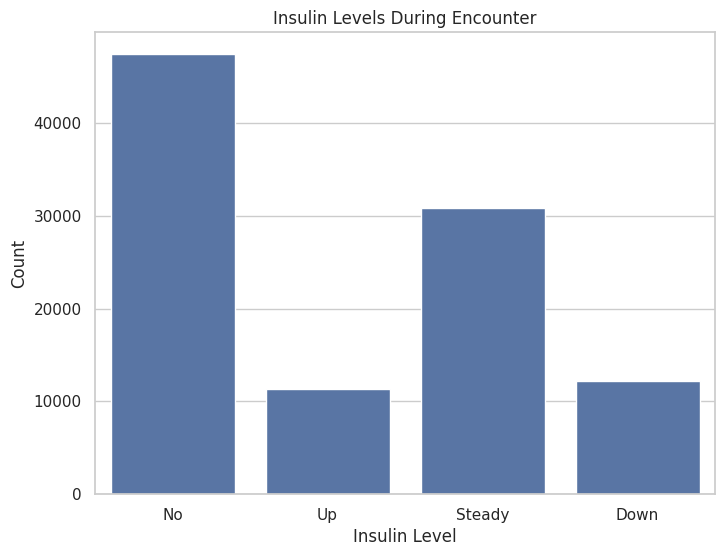

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='insulin')
plt.title('Insulin Levels During Encounter')
plt.xlabel('Insulin Level')
plt.ylabel('Count')
plt.show()

In [ ]:
medication_variables = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
    'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed'
]

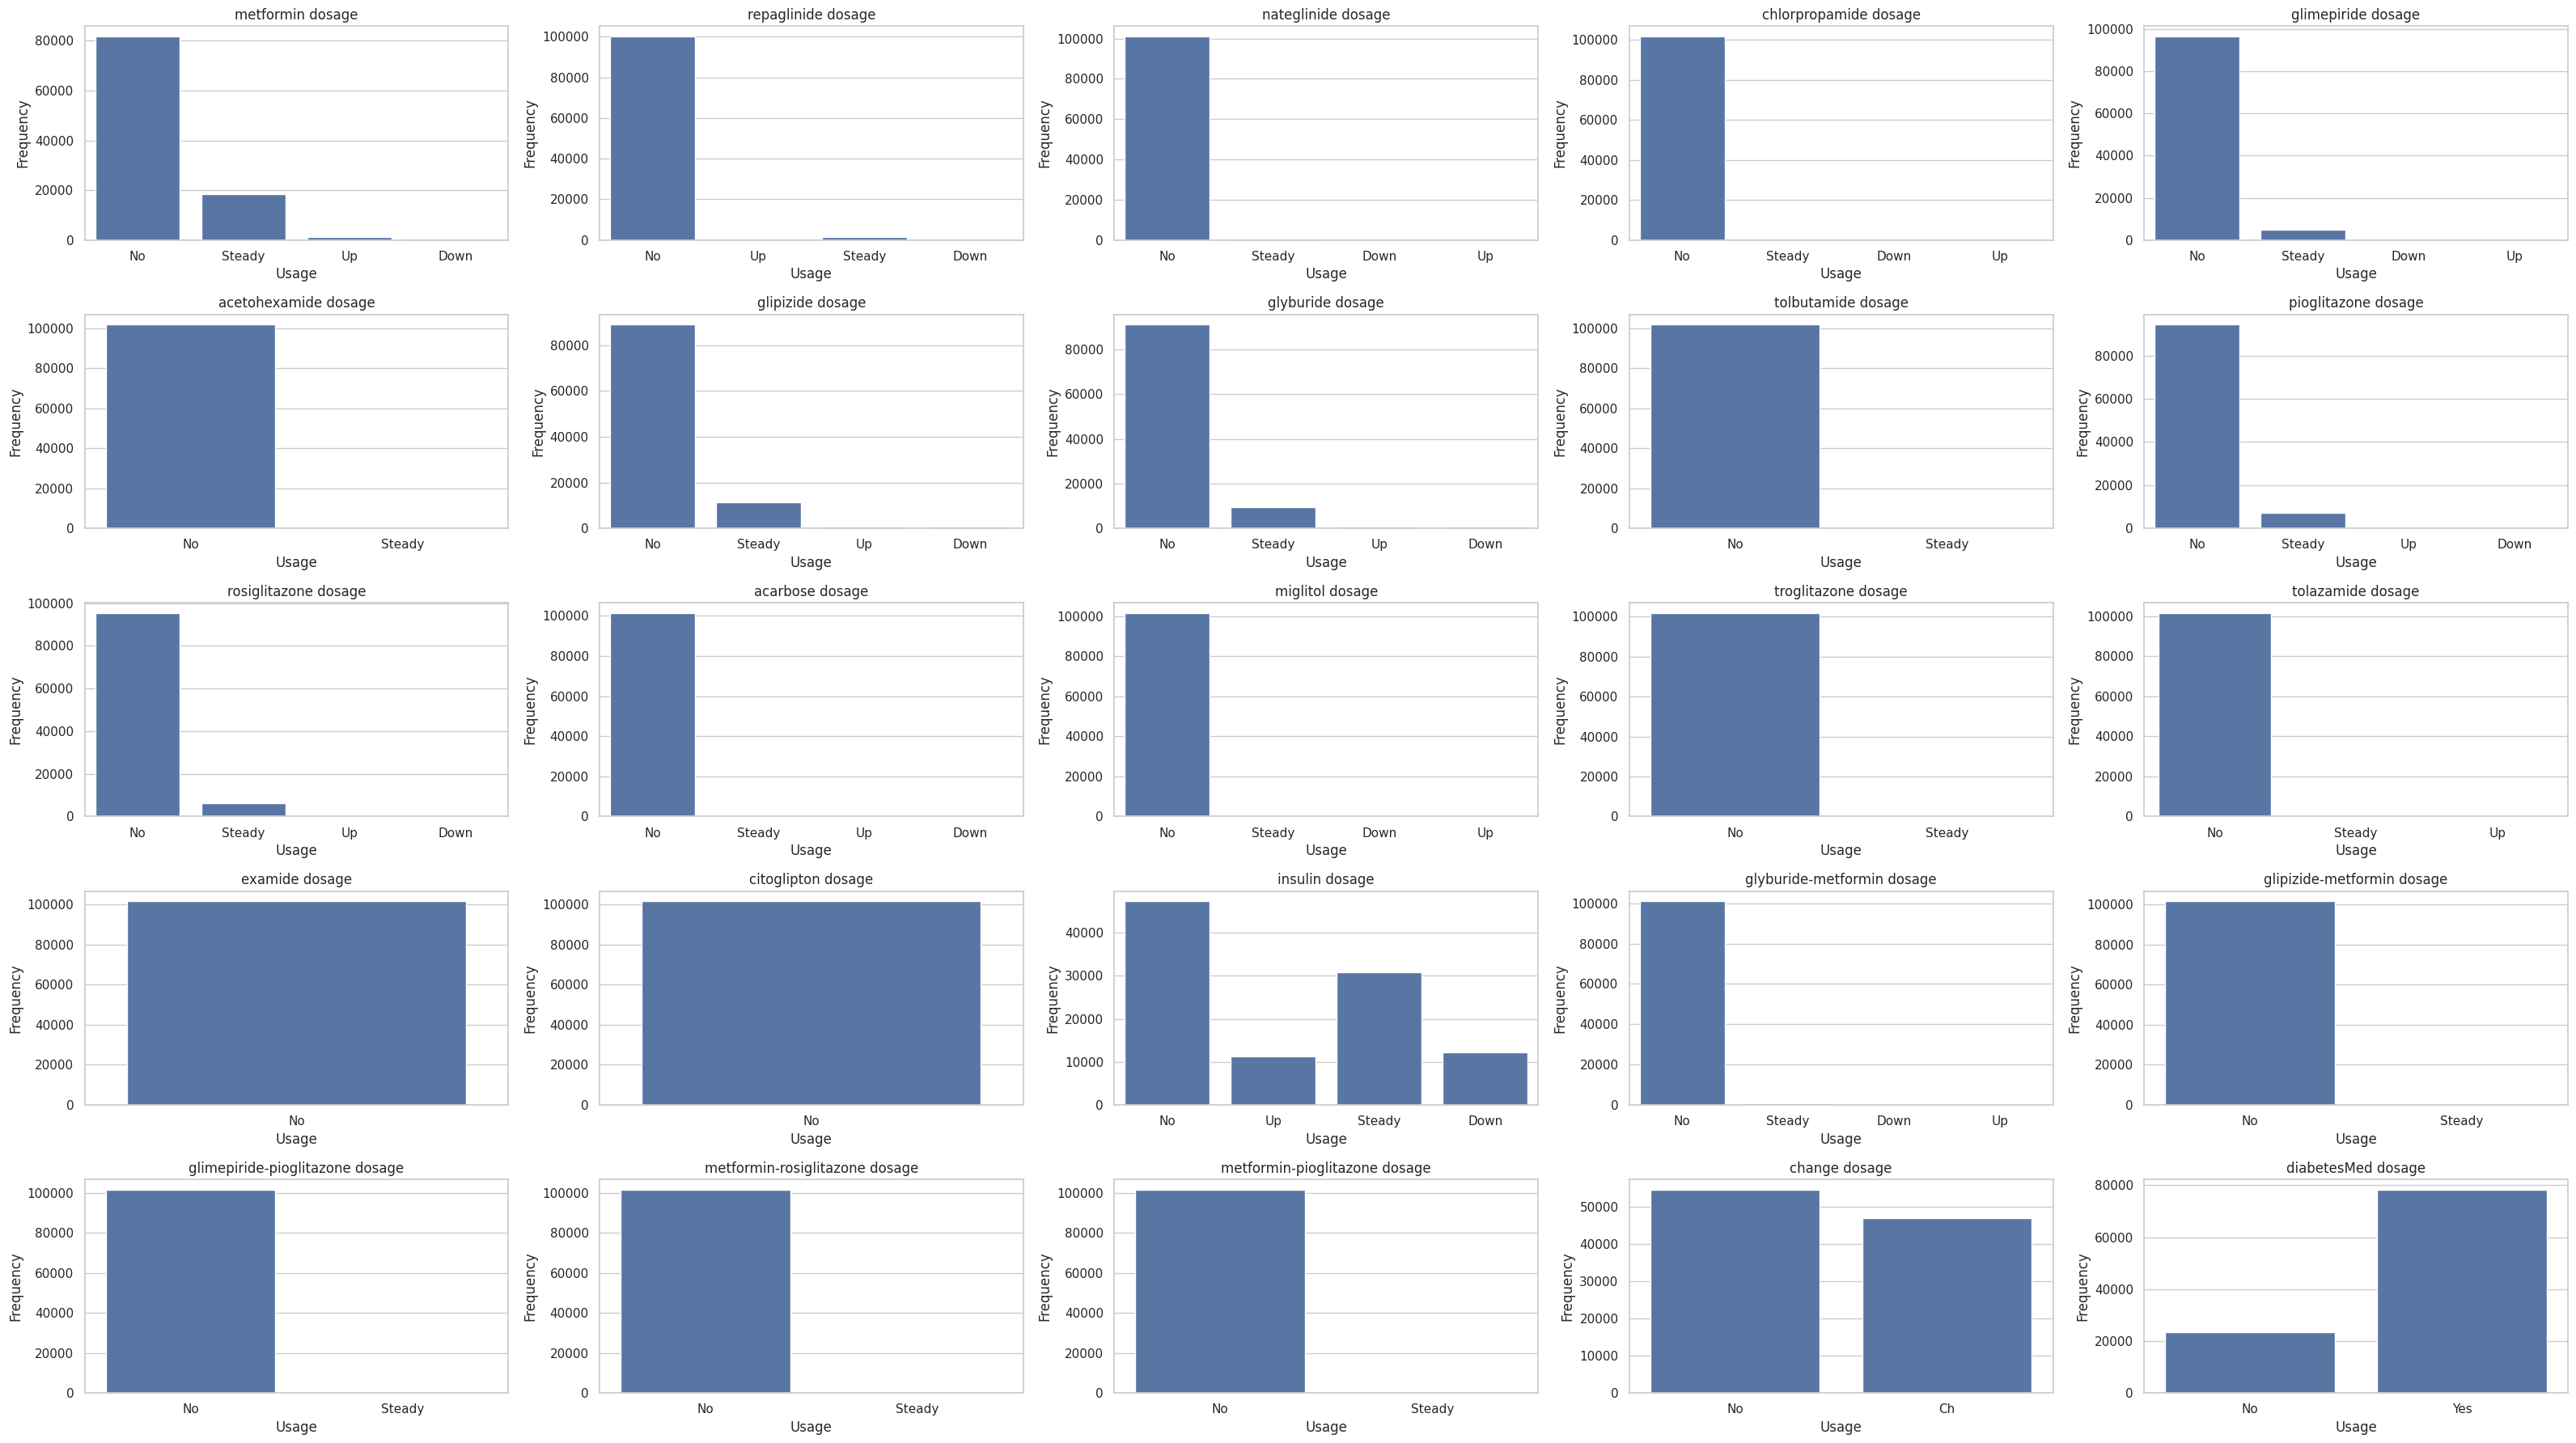

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(5, 5, figsize=(32, 18))

for med in medication_variables:
  row = medication_variables.index(med) // 5
  col = medication_variables.index(med) % 5
  sns.countplot(data=df, x=med, ax=ax[row][col])
  ax[row][col].set_title(f'{med} dosage')
  ax[row][col].set_xlabel('Usage')
  ax[row][col].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Set the threshold: drop columns with more than 50% missing values
threshold = 0.8 # Adjust this value as needed (e.g., 0.7 for 70%)

# Calculate the proportion of missing values for each column
missing_proportion = df.isnull().mean()

# Drop columns where the proportion of missing values exceeds the threshold
df = df.drop(columns=missing_proportion[missing_proportion > threshold].index)

# Show the columns that were dropped
dropped_columns = missing_proportion[missing_proportion > threshold].index
print(f"Columns dropped: {list(dropped_columns)}")

df.info()

Columns dropped: ['weight', 'max_glu_serum', 'A1Cresult']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  object
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                61510 non-null   object
 10  medical_specialty         51817 non-null   object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  n

In [ ]:
df['race'].fillna(df['race'].mode()[0], inplace=True)

In [ ]:
df['payer_code'].fillna(df['payer_code'].mode()[0], inplace=True)

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df["readmitted"].unique()

array(['NO', '>30', '<30'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

### 1. Encode Categorical Columns ###
# Use LabelEncoder for 'medical_specialty' column
le_specialty = LabelEncoder()
df['medical_specialty_encoded'] = le_specialty.fit_transform(df['medical_specialty'])

### 1. Encode Categorical Columns ###
# Use LabelEncoder for 'medical_specialty' column
le_specialty = LabelEncoder()
df['diag_1_encoded'] = le_specialty.fit_transform(df['diag_1'])

### 1. Encode Categorical Columns ###
# Use LabelEncoder for 'medical_specialty' column
le_specialty = LabelEncoder()
df['diag_2_encoded'] = le_specialty.fit_transform(df['diag_2'])

### 1. Encode Categorical Columns ###
# Use LabelEncoder for 'medical_specialty' column
le_specialty = LabelEncoder()
df['diag_3_encoded'] = le_specialty.fit_transform(df['diag_3'])

### 2. Select Columns for KNN Imputation ###
# List of columns you want to apply KNN on
columns_for_knn = ['medical_specialty_encoded', 'diag_1_encoded', 'diag_2_encoded', 'diag_3_encoded']

# Create a new DataFrame containing only the selected columns
data_knn = df[columns_for_knn]

### 3. Apply KNN Imputation ###
imputer = KNNImputer(n_neighbors=3)
data_knn_imputed = imputer.fit_transform(data_knn)

# Convert back to DataFrame
data_knn_imputed_df = pd.DataFrame(data_knn_imputed, columns=columns_for_knn)

### 4. Update the Original DataFrame ###
# Replace the original columns with the imputed values
df[columns_for_knn] = data_knn_imputed_df

df['medical_specialty'] = le_specialty.inverse_transform(df['medical_specialty_encoded'].round().astype(int))
df['diag_1'] = le_specialty.inverse_transform(df['diag_1_encoded'].round().astype(int))
df['diag_2'] = le_specialty.inverse_transform(df['diag_2_encoded'].round().astype(int))
df['diag_3'] = le_specialty.inverse_transform(df['diag_3_encoded'].round().astype(int))

# Final DataFrame with imputed values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   encounter_id               101766 non-null  int64  
 1   patient_nbr                101766 non-null  int64  
 2   race                       101766 non-null  object 
 3   gender                     101766 non-null  object 
 4   age                        101766 non-null  object 
 5   admission_type_id          101766 non-null  object 
 6   discharge_disposition_id   101766 non-null  int64  
 7   admission_source_id        101766 non-null  int64  
 8   time_in_hospital           101766 non-null  int64  
 9   payer_code                 101766 non-null  object 
 10  medical_specialty          101766 non-null  object 
 11  num_lab_procedures         101766 non-null  int64  
 12  num_procedures             101766 non-null  int64  
 13  num_medications            10

In [ ]:
#from sklearn.preprocessing import LabelEncoder
### 1. One-Hot Encoding for Nominal Variables ###

# Use pd.get_dummies() for nominal categorical variables
#one_hot_columns = ['race', 'gender', 'admission_type_id', 'change', 'diabetesMed', 'discharge_disposition_id', 'medical_specialty','age',"diag_1_encoded","diag_2_encoded","diag_3_encoded"]

# Perform one-hot encoding and remove the original columns
#df = pd.get_dummies(df, columns=one_hot_columns)

### 2. Label Encoding for Ordinal Variables ###

# Label encoding for 'age' (ordinal)
#le_age = LabelEncoder()
#df['age_encoded'] = le_age.fit_transform(df['age'])

# Optional: If you treat readmission as ordinal (otherwise, skip this step)
#le_readmission = LabelEncoder()
#df['readmission_encoded'] = le_readmission.fit_transform(df['readmitted'])

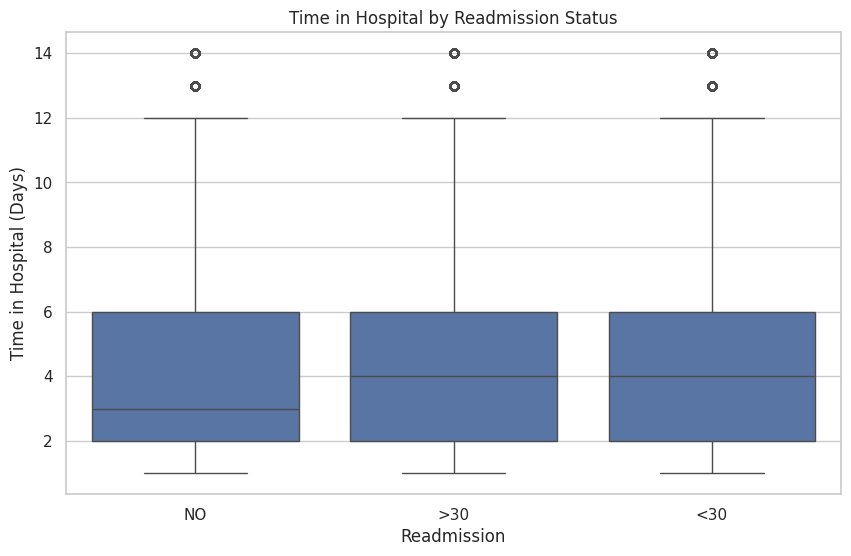

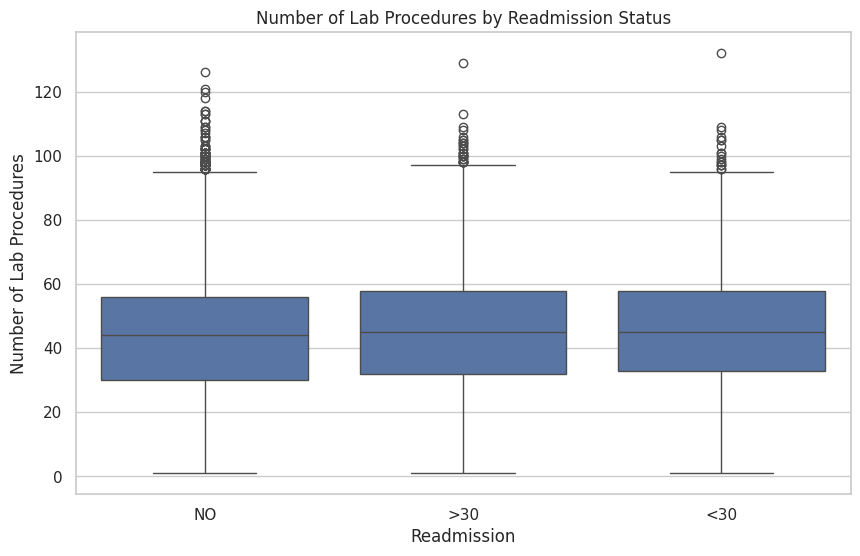

In [ ]:
# Example: Time in Hospital vs. Readmission
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='readmitted', y='time_in_hospital')
plt.title('Time in Hospital by Readmission Status')
plt.xlabel('Readmission')
plt.ylabel('Time in Hospital (Days)')
plt.show()

# Example: Number of Lab Procedures vs. Readmission
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='readmitted', y='num_lab_procedures')
plt.title('Number of Lab Procedures by Readmission Status')
plt.xlabel('Readmission')
plt.ylabel('Number of Lab Procedures')
plt.show()

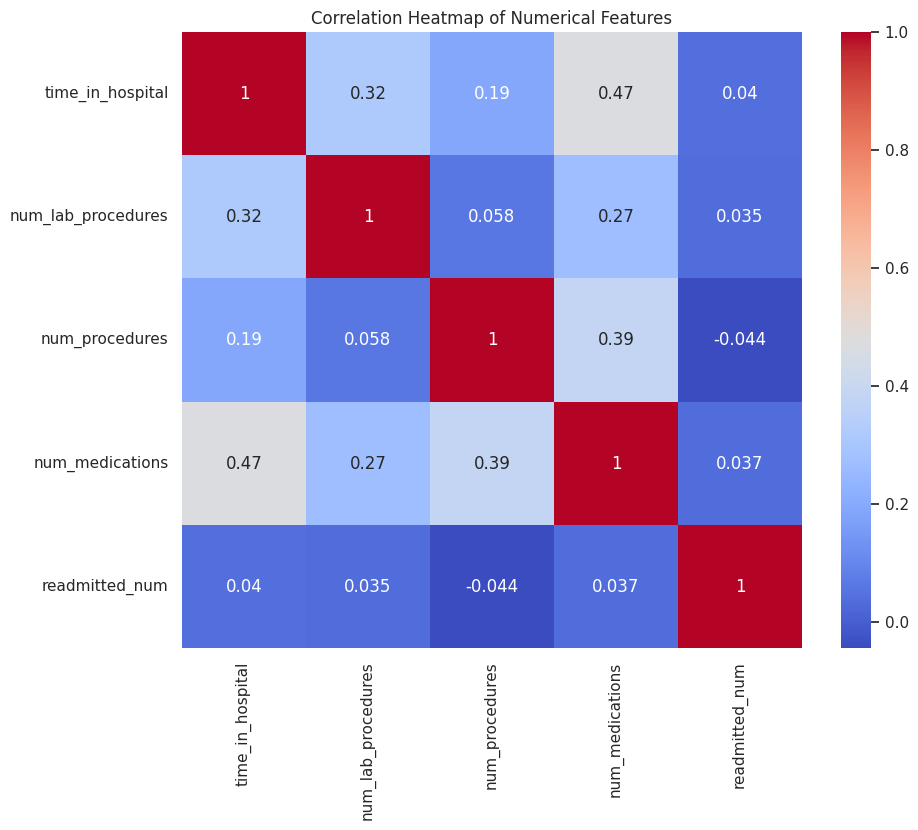

In [ ]:
# Convert 'readmitted' to numerical if needed (e.g., NO = 0, <30 = 1, >30 = 2)
readmitted_mapping = {'NO': 0, '<30': 1, '>30': 2}
df['readmitted_num'] = df['readmitted'].map(readmitted_mapping)

# Select numerical features and calculate the correlation matrix
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'readmitted_num']
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

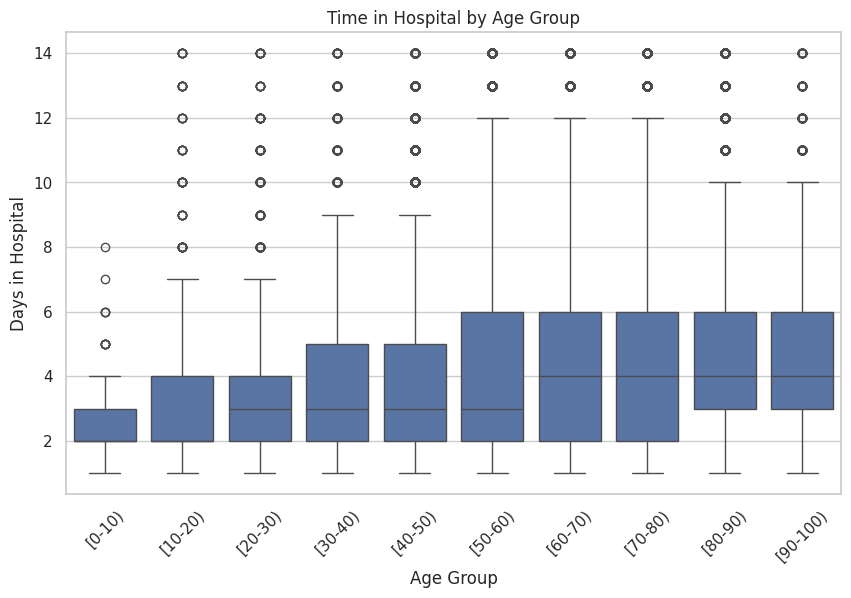

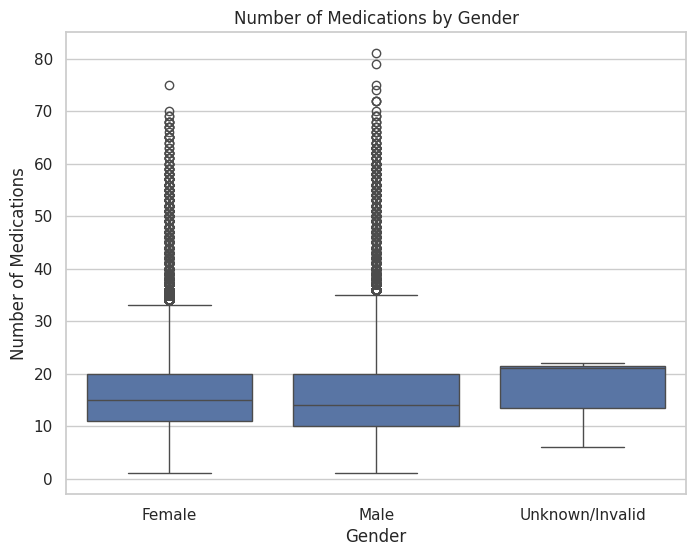

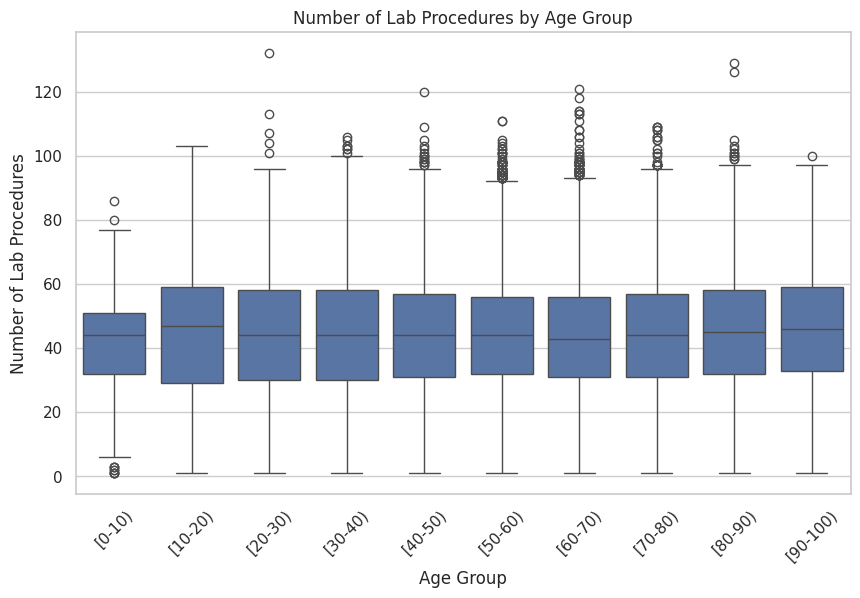

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")

# Plot 1: Age vs. Time in Hospital
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='time_in_hospital', data=df, order=age_order)
plt.title('Time in Hospital by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Days in Hospital')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Gender vs. Number of Medications
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='num_medications', data=df)
plt.title('Number of Medications by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medications')
plt.show()


# Plot 4: Age vs. Number of Lab Procedures
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='num_lab_procedures', data=df, order=age_order)
plt.title('Number of Lab Procedures by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Lab Procedures')
plt.xticks(rotation=45)
plt.show()

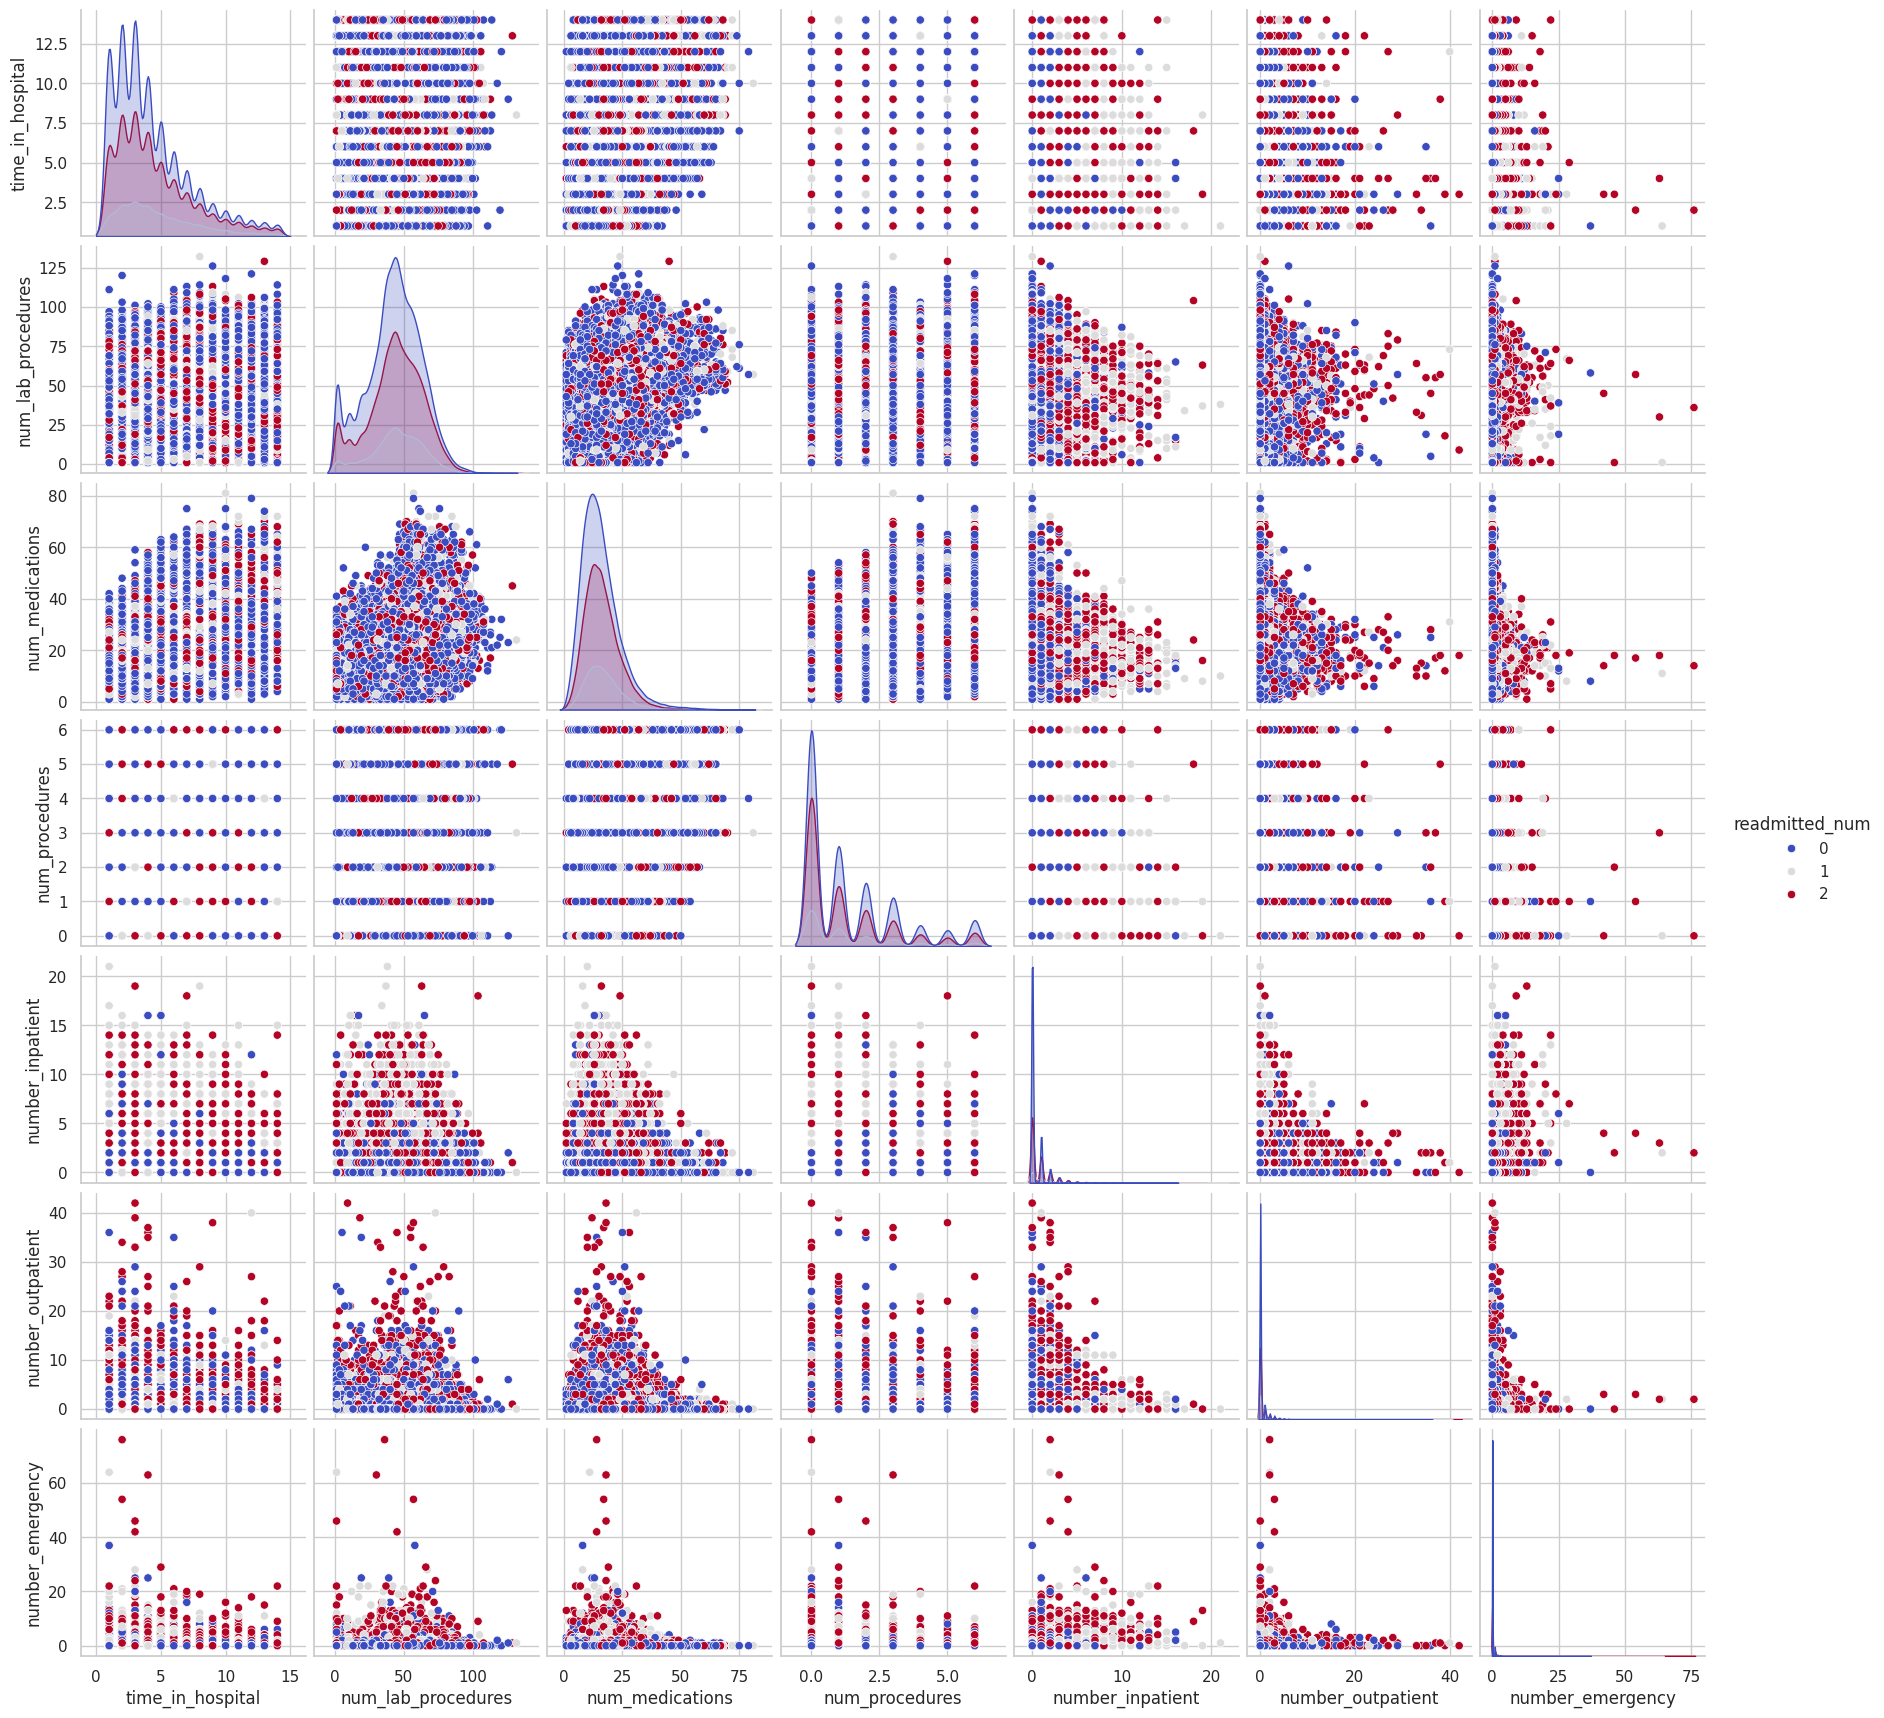

In [ ]:
pairplot_columns = [
    'time_in_hospital', 'num_lab_procedures', 'num_medications',
    'num_procedures', 'age', 'number_inpatient', 'number_outpatient',
    'number_emergency', 'readmitted_num'
]


sns.pairplot(df[pairplot_columns], hue='readmitted_num', palette='coolwarm', diag_kind='kde')
plt.show()